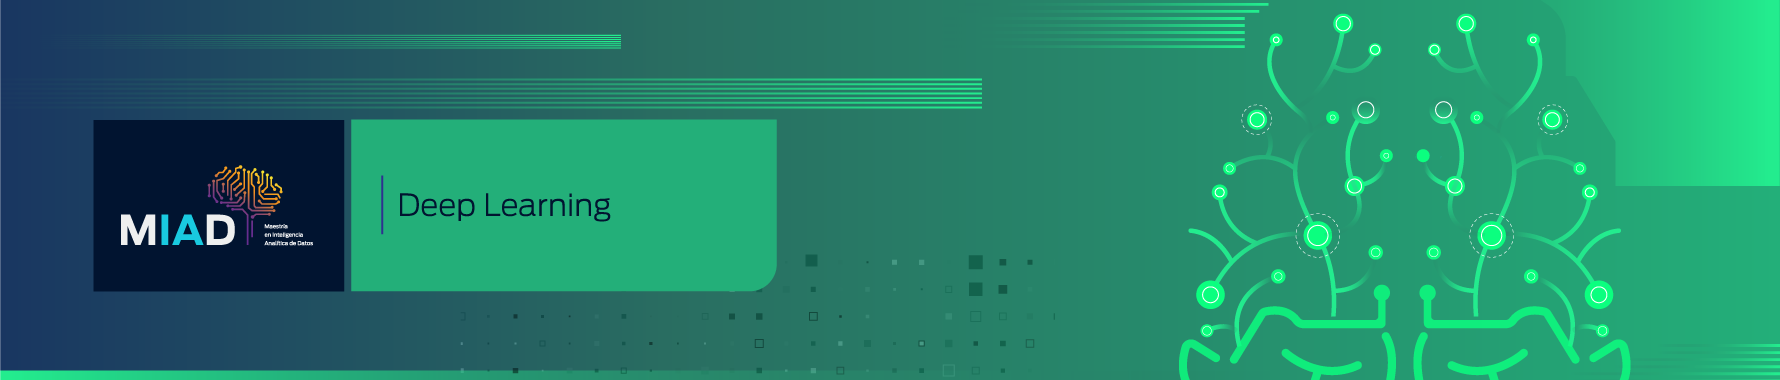

# Estrategias de implementación

## Redes neuronales usando Keras: Implementación en contexto real usando Keras

## Actividad calificada por el personal

### Propósito 

En el laboratorio "Estimación de red neuronal con múltiples capas" se propuso una implementación manual de redes neuronales usando librerías básicas de python como lo son *pandas* y *numpy*. *Google* desarrolló un *API* para el aprendizaje automático cuyo nombre es *"Keras"*, esta es escrita en *python* y es utilizada para hacer implementaciones de redes neuronales simples.

Así, en este *notebook* se pretende evaluar el uso de *keras* al aplicar una red neuronal en un contexto real. 

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios a evaluar

Los criterios que se evaluarán son:

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [30 puntos]

Estimación de un modelo utilizando redes neuronales: Se estima el modelo usando una red neuronal, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado [30 puntos]

Elección del mejor modelo: Se elige la mejor combinación de hiperparámetros de acuerdo a los resultados obtenidos y justifica adecuadamente la selección. [40 puntos]


#### Problema

Un *manager* de un banco manifiesta preocupación porque los clientes están renunciando a las tarjetas de crédito. Este cuenta con los datos disponibles en 
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers a cerca de 10000 clientes, si tiene productos activos o no (*"Attrition flag"*), en función de variables tales como edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc.

Ustedes deben proponer el algoritmo para hacer la clasificación de los clientes con una red neuronal.

Tengan en cuenta que, para resolver los puntos de esta actividad, únicamente deben considerar las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.


### Librerías a importar

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from math import exp

### 1. Análisis preliminar de variables [30 puntos]

Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [61]:
# Cargue de datos 
df = pd.read_csv("BankChurners.csv")


# Se eliminan columnas calculadas y el número de cliente dentro del dataset
data = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                'CLIENTNUM'], axis=1)

# Composición de dataframe
display(data.head(5))
print(f'Columnas: {df.shape[1]} , Filas: {df.shape[0]}')
print("Columnas del set de datos:\n",data.columns)
print("Tipos de datos en el dataframe:\n",data.dtypes)


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Columnas: 23 , Filas: 10127
Columnas del set de datos:
 Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')
Tipos de datos en el dataframe:
 Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit  

In [62]:
# Df Describe 
with pd.option_context(
    "display.float_format",
    "{:.2f}".format,
    "display.max_columns",
    None,
):
    display(data.describe())

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27
std,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28
min,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02
50%,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18
75%,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50
max,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00


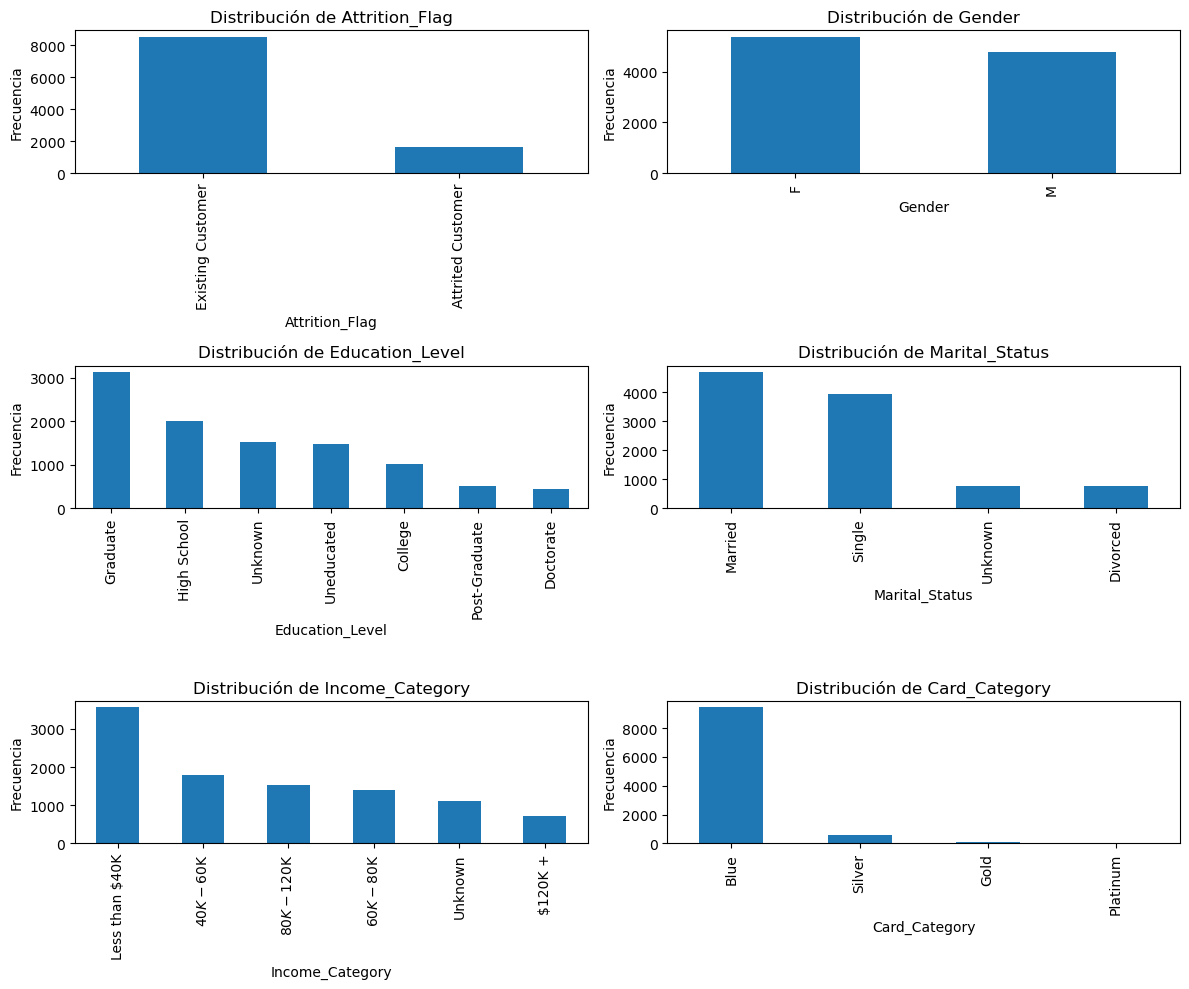

In [68]:
# Selección y anàlisis de columnas categóricas 
columnas_categoricas = data.select_dtypes(include=['object'])

# Se calculan los subgraficos a crear 
num_filas = len(columnas_categoricas.columns) // 2
if len(columnas_categoricas.columns) % 2 == 0:
    num_columnas = 2
else:
    num_columnas = 3

fig, axs = plt.subplots(num_filas, num_columnas, figsize=(12, 10))

# Graficar cada columna categórica
for i, columna in enumerate(columnas_categoricas.columns):
    fila = i // num_columnas
    columna = i % num_columnas
    df[columnas_categoricas.columns[i]].value_counts().plot(kind='bar', ax=axs[fila, columna])
    axs[fila, columna].set_title(f'Distribución de {columnas_categoricas.columns[i]}')
    axs[fila, columna].set_xlabel(columnas_categoricas.columns[i])
    axs[fila, columna].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

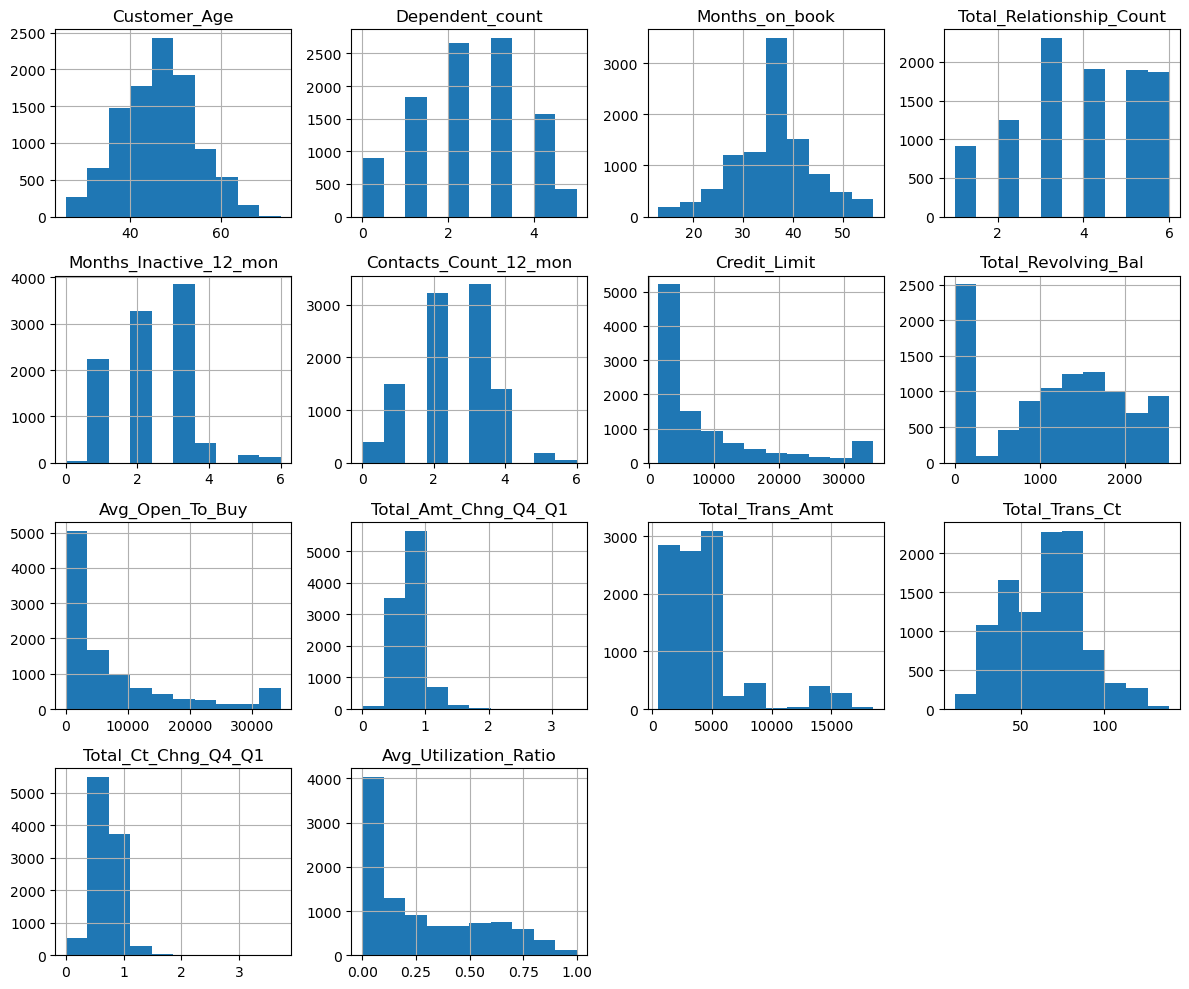

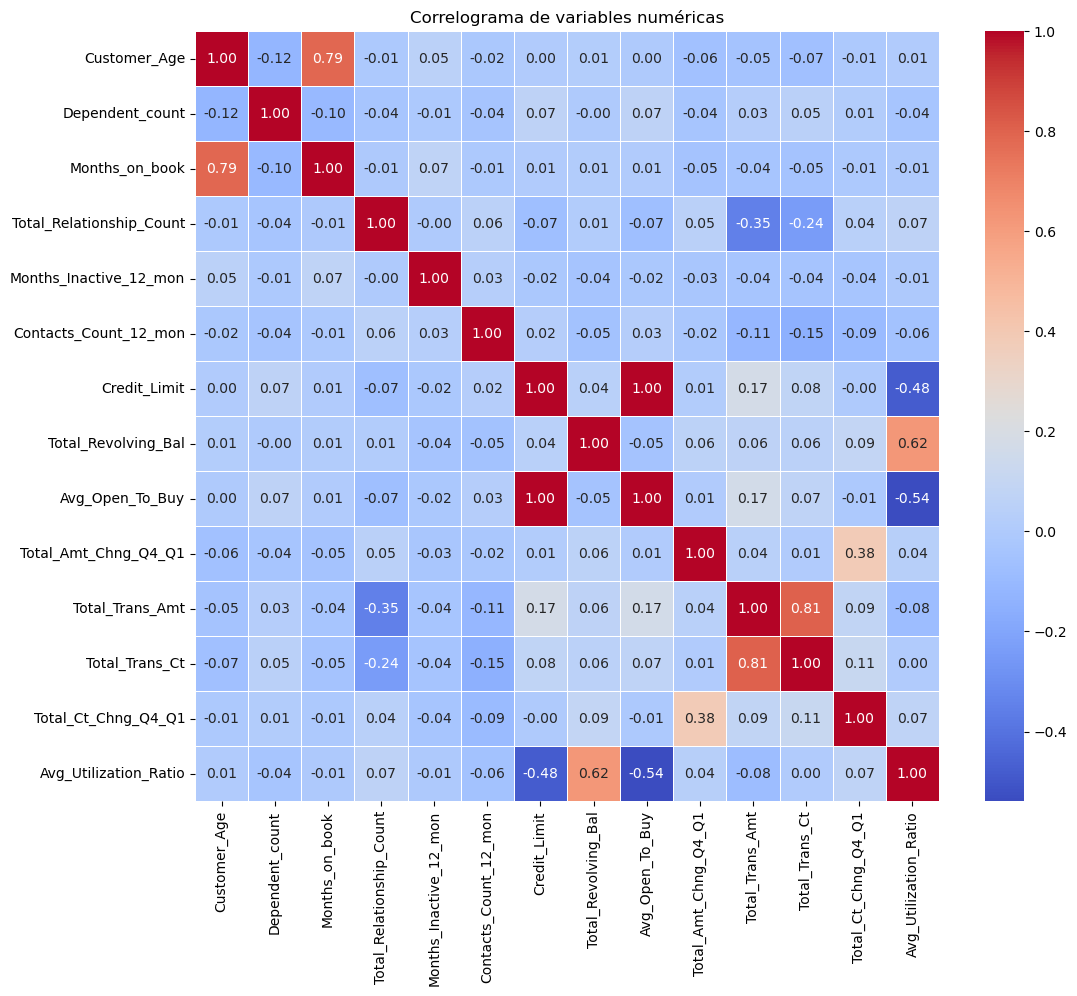

In [69]:
# Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####

# Histogramas de variables numéricas
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Excluir variables categóricas y otras columnas no necesarias
numeric_data = data.select_dtypes(include=[np.number])

# Correlograma (matriz de correlación)
corr = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlograma de variables numéricas")
plt.show()


## Análisis del conjunto de datos

* Se cuenta con un conjunto de datos compuesto por 10,127 registros y 23 columnas que incluyen información categórica como numérica. 
* Alrededor del 15% de los registros corresponden a clientes que han abandonado la compañía.
* Aproximadamente el 60% de los registros son de hombres y el 40% son de mujeres, la mayoría de los clientes tienen un nivel educativo de secundaria.
* Los ingresos de los clientes son inferiores a los $40.000
* Se observa que la mayoría de los clientes están casados. 
* La edad de los clientes sigue una distribución normal, con una media de 46 años y una desviación estándar de 8 años.

In [71]:
# Previo a realizar la construcciòn de la red neuronal, se transforman algunas variables categóricas a numéricas.

# Convertir la variable objetivo en una variable binaria (0 para 'Cliente Actual', 1 para 'Cliente Retirado')
data['Attrition_Flag'] = (data['Attrition_Flag'] == 'Attrited Customer').astype(int)

# Convertir la variable género una variables bienaria (0 para 'Mujeres', 1 para 'Hombres')
data['Gender'] = (data['Gender'] == 'M').astype(int)

# Eliminar observaciones con datos faltantes
data_sin_nan = data.dropna()


# Composición de dataframe
display(data_sin_nan.head(5))
print(f'Columnas: {data_sin_nan.shape[1]} , Filas: {data_sin_nan.shape[0]}')


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Columnas: 20 , Filas: 10127


### 2. Estimación del modelo usando una red neuronal con keras [30 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test con hiperparámetros de su selección.

In [72]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time


# Tomar únicamente las variable snuméricas
numeric_data = data_sin_nan.select_dtypes(include=[np.number])

# Separar variables predictoras y variable objetivo
X = numeric_data.drop(['Attrition_Flag'], axis=1)
y = numeric_data['Attrition_Flag']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construir modelo de red neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start = time.time()

# Entrenar el modelo
history=model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=2)

end = time.time()


Epoch 1/10
222/222 - 1s - loss: 0.1124 - accuracy: 0.9684 - 841ms/epoch - 4ms/step
Epoch 2/10
222/222 - 0s - loss: 0.0012 - accuracy: 1.0000 - 331ms/epoch - 1ms/step
Epoch 3/10
222/222 - 0s - loss: 4.0435e-04 - accuracy: 1.0000 - 269ms/epoch - 1ms/step
Epoch 4/10
222/222 - 0s - loss: 2.0116e-04 - accuracy: 1.0000 - 288ms/epoch - 1ms/step
Epoch 5/10
222/222 - 0s - loss: 1.1974e-04 - accuracy: 1.0000 - 325ms/epoch - 1ms/step
Epoch 6/10
222/222 - 0s - loss: 7.8731e-05 - accuracy: 1.0000 - 329ms/epoch - 1ms/step
Epoch 7/10
222/222 - 0s - loss: 5.5166e-05 - accuracy: 1.0000 - 234ms/epoch - 1ms/step
Epoch 8/10
222/222 - 0s - loss: 4.0513e-05 - accuracy: 1.0000 - 218ms/epoch - 981us/step
Epoch 9/10
222/222 - 0s - loss: 3.0725e-05 - accuracy: 1.0000 - 321ms/epoch - 1ms/step
Epoch 10/10
222/222 - 0s - loss: 2.3888e-05 - accuracy: 1.0000 - 283ms/epoch - 1ms/step


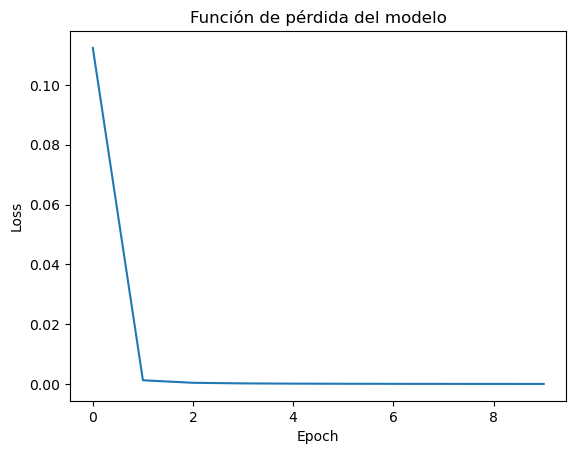

Tiempo de ejecución: 3.5114309787750244
95/95 - 0s - loss: 2.0330e-05 - accuracy: 1.0000 - 174ms/epoch - 2ms/step

Test accuracy: 1.0


In [73]:
plt.plot(history.history['loss'])
plt.title('Función de pérdida del modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

print("Tiempo de ejecución: " +str(end - start))
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

### Procedimiento:

* Se seleccionaron únicamente las variables numéricas del conjunto conjunto de datos.
* Se dividió el conjunto de datos en conjuntos de entrenamiento y pruebas
* Para asegurarnos que todas las variables tengan escalas similares se normalizaron las variables.
* Se construyó el modelo de red neurona con tres capas densamente conectadas, con activación 'relu' en las dos primeras capas y 'sigmoid' en la capa de salida, ya que se trata de un problema de clasificación binaria.
* Se compiló el modelo utilizando el optimizador 'adam' y la función de pérdida 'binary_crossentropy'.

### Resultado :

* El modelo alcanzó una precisión del 100% tanto en los datos de entrenamiento como en los datos de prueba. Esto sugiere que el modelo es capaz de aprender perfectamente la relación entre las variables predictoras y la variable objetivo en el conjunto de datos de prueba.


### 3. Elección del mejor modelo [40 puntos]

Ahora construyan una función que reciba por parámetro una lista de número de capas a utilizar,  números de neuronas por capa, así como funciones de activación a utilizar.

Dicha función debe entrenar el modelo con los datos de entrenamiento, evaluar con los datos de prueba para cada una de las combinaciones de hiperparámetros y encontrar cuál es la mejor combinación de hiperprámetros.  

Una vez hecho este procedimiento respondan a la siguiente pregunta:
 
¿Cómo argumenta que esta sea la selección óptima de hiperparámetros?

In [74]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

import itertools

def entrenar_evaluar_modelo(X_train, y_train, X_test, y_test, num_capas, neuronas_por_capa, funciones_activacion):
    mejor_precision = 0
    mejor_hiperparametros = None
    
    # Iterar sobre todas las combinaciones de hiperparámetros
    for num_capas_actual, neuronas_por_capa_actual, funciones_activacion_actual in itertools.product(num_capas, neuronas_por_capa, funciones_activacion):
        # Construir modelo de red neuronal
        model = Sequential()
        model.add(Dense(neuronas_por_capa_actual, activation=funciones_activacion_actual, input_shape=(X_train.shape[1],)))
        for _ in range(num_capas_actual - 1):
            model.add(Dense(neuronas_por_capa_actual, activation=funciones_activacion_actual))
        model.add(Dense(1, activation='sigmoid'))
        
        # Compilar el modelo
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
        # Entrenar el modelo
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        
        # Evaluar el modelo en la muestra de prueba
        _, test_acc = model.evaluate(X_test, y_test, verbose=0)
        
        # Actualizar mejor precisión y hiperparámetros si es necesario
        if test_acc > mejor_precision:
            mejor_precision = test_acc
            mejor_hiperparametros = (num_capas_actual, neuronas_por_capa_actual, funciones_activacion_actual)
    
    return mejor_hiperparametros, mejor_precision

# Utilizar la función de optimización
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

num_capas = [1, 2, 3]
neuronas_por_capa = [32, 64, 128]
funciones_activacion = ['relu', 'sigmoid']

mejor_hiperparametros, mejor_precision = entrenar_evaluar_modelo(X_train_scaled, y_train, X_test_scaled, y_test, num_capas, neuronas_por_capa, funciones_activacion)

print("Mejores hiperparámetros encontrados:", mejor_hiperparametros)
print("Precisión en la muestra de prueba:", mejor_precision)


Mejores hiperparámetros encontrados: (1, 32, 'relu')
Precisión en la muestra de prueba: 1.0


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)